In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_15_Resampled_Data.csv")

In [3]:
df = df.iloc[:,1:]

In [4]:
df['Label-0/1'].value_counts()

0.0    414130
1.0    414130
Name: Label-0/1, dtype: int64

In [5]:
X = df.drop(['Label-0/1'], axis = 1)
y = df['Label-0/1']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
    random_state = 42,
    test_size = 0.2)

In [7]:
dc = DecisionTreeClassifier()

In [8]:
bag_model = BaggingClassifier(
base_estimator= dc,  
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [32]:
params_grid = {
    'n_estimators':[20,50,100]
}

In [22]:
grid_dc = GridSearchCV(bag_model,params_grid,scoring = 'accuracy', refit = True, n_jobs = 1).fit(X_train, y_train)

In [37]:
grid_dc.best_params_

{'n_estimators': 20}

In [38]:
accuracy=grid_dc.best_score_*100
print("Accuracy for our training dataset",accuracy)

Accuracy for our training dataset 96.33644614485733


In [8]:
bc_clf = BaggingClassifier(base_estimator= dc, 
n_estimators = 20,
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0)

In [9]:
bc_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=20, oob_score=True, random_state=0)

In [11]:
y_pred = bc_clf.predict(X_train)

In [12]:
print("Accuracy for our training dataset",bc_clf.oob_score_*100)

Accuracy for our training dataset 96.65654504624152


In [13]:
recall_score = recall_score(y_true = y_train, y_pred = y_pred)
print("Recall for our testing dataset",recall_score)

Recall for our testing dataset 0.9982067004193422


In [14]:
cm= confusion_matrix(y_train,y_pred)

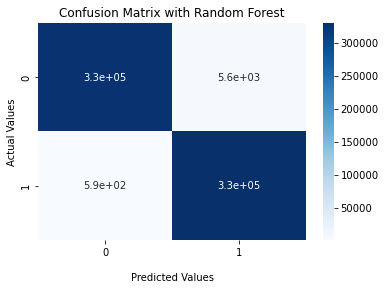

In [15]:
ax = sns.heatmap(cm, annot = True, cmap = 'Blues')
ax.set_title("Confusion Matrix with Random Forest")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values")
plt.show()

In [17]:
filename = 'bagging_model.sav'
pickle.dump(bc_clf, open(filename, 'wb'))